In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
%matplotlib inline


In [2]:
df = pd.read_excel("Topics_stars10000_project_keyword.xlsx") #star>10000개가 있는 Df
# df = pd.read_excel("Topics_keywords.xlsx")   # vehicle Data가 들은 Df
df.drop_duplicates(['project_name'])
df.head(50)

,project_name,topic_keyword
0,freeCodeCamp/freeCodeCamp,"['react', 'nodejs', 'javascript', 'd3', 'teach..."
1,996icu/996.ICU,[]
2,EbookFoundation/free-programming-books,"['education', 'list', 'books', 'resource', 'ha..."
3,jwasham/coding-interview-university,"['computer-science', 'algorithm', 'algorithms'..."
4,vuejs/vue,"['javascript', 'framework', 'vue', 'frontend']"
5,facebook/react,"['react', 'javascript', 'library', 'ui', 'fron..."
6,kamranahmedse/developer-roadmap,"['computer-science', 'engineering', 'roadmap',..."
7,sindresorhus/awesome,"['lists', 'awesome', 'unicorns', 'resources', ..."
8,tensorflow/tensorflow,"['python', 'machine-learning', 'deep-neural-ne..."
9,public-apis/public-apis,"['api', 'list', 'development', 'public', 'reso..."


In [3]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

for i in range(len(target)):
    print(target[i],string_list[i])

139 139
machinelearning ['machinelearning-python', 'ml', 'machine-translation', 'machine-learning-from-scratch', 'machine-learning-algorithms', 'machine-learning']
package ['packages', 'package-manager', 'packaging']
zsh ['zsh-theme', 'zsh-prompt', 'zsh-configuration', 'zsh-autosuggestions']
zerossl ['zero-copy', 'zero-configuration']
youtube ['youtube-live']
xcode ['xcode10']
x64 ['x86-64', 'x86']
wysiwyg ['wysiwyg-editor']
workflow ['workflow-automation', 'works-with-clojurescript', 'works-with-codespaces', 'works-with-construct', 'works-with-elm', 'works-with-flutter', 'works-with-gatsby', 'works-with-mint', 'works-with-phaser', 'works-with-react', 'works-with-reason', 'works-with-svelte', 'works-with-vue', 'works-with-yew']
windows ['windowing', 'windows-10', 'windows-console', 'windows-terminal', 'windowscontainers']
weixin ['weixin-plugin']
wechat ['wechat-macos', 'wechat-mini-program', 'wechat-plugin', 'wechat-weapp']
web ['webxr', 'webworkers', 'webview', 'webtorrent', 'webstor

In [4]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


topic_dic_2 = {}
for i in topic_dic:
    topic_dic_2[i[0]]=i[1]
topic_list


df['topic_keyword_str'] = [" ".join(df['topic_keyword'][i]) for i in range(len(df['topic_keyword']))]

topic_keyword_str = []
for i in range(len(df['topic_keyword'])):
    temp=[]
    for j in df['topic_keyword'][i]:
        temp.append(same_things(j))
    topic_keyword_str.append(" ".join(temp))
df['topic_keyword_str'] = topic_keyword_str
topic_keyword_str



['react nodejs javascript d3 teachers community education programming curriculum math free learn-to-code nonprofits careers certificate',
 '',
 'education list books resource hacktoberfest',
 'computer-science algorithm algorithm interview data software interview study-plan interview interview interview programming',
 'javascript framework vue frontend',
 'react javascript library ui frontend declarative',
 'computer-science engineering roadmap study-plan developer-roadmap devops frontend backend-roadmap',
 'lists awesome unicorns resources awesome',
 'python machinelearning neural deep-learning neural tensorflow machinelearning distributed',
 'api list development public resources free software api api',
 'javascript css html sass bootstrap scss css',
 'javascript education programming es6 async book book-series es2015 learn-to-code training-providers closures prototypes material',
 'python design development programming web system design interview web web interview interview system',

In [5]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

fit_transform, (sentence 1000, feature 216)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.53670439, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [6]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df['project_name'])
tfidf_vector_df

,admin,algorithm,analytics,android,angular,animation,ansi,api,app,architecture,...,vpn,vue,web,wechat,windows,workflow,xcode,zerossl,zookeeper,zsh
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996icu/996.ICU,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EbookFoundation/free-programming-books,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jwasham/coding-interview-university,0.000000,0.34822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vuejs/vue,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.512163,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mpv-player/mpv,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dianping/cat,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oracle/graal,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 134임
pca = PCA(n_components=155)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.200725,0.038624,0.085080,0.095192,0.047665,-0.037715,0.029499,-0.100122,0.070947,-0.062201,...,-0.014641,0.003234,-0.008343,0.000060,0.009341,0.020905,0.011936,-0.044003,-0.011549,-0.039374
996icu/996.ICU,-0.045399,-0.038910,-0.030444,-0.032809,0.009810,-0.009769,-0.020761,0.008933,0.000525,-0.038147,...,-0.003210,0.001857,0.000380,-0.004401,-0.001461,-0.000536,-0.003159,-0.001379,-0.001975,-0.003115
EbookFoundation/free-programming-books,-0.030770,-0.042380,-0.116729,0.278091,0.174114,-0.045301,0.171026,0.067311,-0.134643,0.051681,...,0.026002,0.036641,0.017672,0.007554,0.036992,0.013429,-0.031059,0.097155,-0.028754,0.060020
jwasham/coding-interview-university,-0.052740,0.050063,0.086142,-0.083001,0.048671,0.099304,0.199585,0.142744,0.462761,0.124432,...,-0.007577,0.014565,-0.018892,0.009042,0.003279,-0.030490,0.001776,0.018175,-0.002143,0.025912
vuejs/vue,0.330766,0.063389,0.007522,-0.104730,-0.078008,0.020197,-0.022332,0.093897,-0.058047,0.012558,...,0.013264,-0.008451,0.005801,0.014877,-0.006361,-0.021199,-0.002911,-0.019530,-0.050804,-0.028104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mpv-player/mpv,-0.047813,-0.062044,-0.041551,-0.076252,-0.044486,0.007173,-0.035108,-0.035436,-0.071695,-0.028307,...,0.014616,-0.050628,-0.022824,0.042574,-0.034550,-0.005341,-0.037597,-0.004588,0.018129,0.018204
dianping/cat,-0.088468,-0.041522,-0.043072,-0.006213,-0.122822,-0.079374,0.116329,-0.015673,0.096668,0.038010,...,-0.031958,-0.071006,-0.029919,0.001203,0.048682,0.023734,0.010496,0.003743,0.026221,-0.038943
oracle/graal,0.085178,0.337795,-0.011673,0.064508,-0.265788,0.193668,0.269474,0.016053,0.071328,-0.006850,...,-0.009915,-0.022605,0.005792,0.008351,-0.002273,-0.031237,-0.011285,0.020355,-0.012678,-0.004266


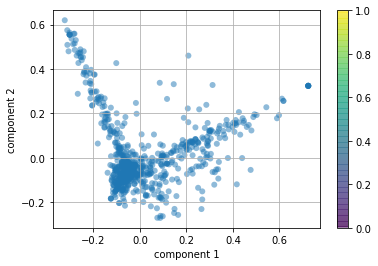

In [8]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [9]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
print(pca.explained_variance_ratio_.sum())

# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
print(pca_temp.n_components_)




0.9507232482849892
155


In [10]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.025167,0.034202,0.034202
pca2,0.019263,0.026178,0.060381
pca3,0.016489,0.022409,0.082789
pca4,0.015737,0.021386,0.104175
pca5,0.014790,0.020099,0.124274
...,...,...,...
pca151,0.001208,0.001642,0.944574
pca152,0.001171,0.001591,0.946165
pca153,0.001138,0.001546,0.947711
pca154,0.001113,0.001513,0.949224


In [11]:
dbscan = DBSCAN(eps = 0.5, min_samples=5)
# dbscan = DBSCAN(eps = 0.5)
dbscan_cluster = dbscan.fit_predict(df_pca)
dbscan_cluster

array([-1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1,  0,  1,  0, -1,  0, -1, -1,  2, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1,  8, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1,
       -1, -1, -1,  0,  0, -1,  3, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1,  3, -1, -1,  4, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  2, -1,  0,
        0, -1, -1, -1, -1, -1, -1,  5, -1, -1,  0,  0, -1, -1, -1, -1,  5,
       -1, -1, -1,  2,  3,  4, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,
        0, -1, -1, -1, -1, -1,  2, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1,
       -1, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1

In [12]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))
for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df['project_name'][idx])
dbscan_clustered_dic



# 클러스터링이 된 패키지들
# 20개의 군집으로 생성
dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])
dbscan_clustered_dic


df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num



topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
topic_dbscan_clustered_list

[[('javascript', 177),
  ('react', 120),
  ('web', 119),
  ('python', 89),
  ('nodejs', 71),
  ('hacktoberfest', 68),
  ('vue', 68),
  ('data', 66),
  ('awesome', 64),
  ('interview', 63),
  ('sql', 54),
  ('machinelearning', 53),
  ('android', 51),
  ('test', 48),
  ('api', 47)],
 [('flutter', 3),
  ('dotnet', 2),
  ('dotnet-core', 2),
  ('slideshow', 1),
  ('slides', 1),
  ('presentations', 1),
  ('koa', 1),
  ('knowledge', 1),
  ('hangzhou', 1),
  ('dart', 1),
  ('deprecated', 1),
  ('not-maintained', 1),
  ('waifu2x', 1),
  ('torch', 1),
  ('super-resolution', 1)],
 [('python', 11),
  ('queue', 4),
  ('task', 3),
  ('awesome', 1),
  ('collections', 1),
  ('asynchronous', 1),
  ('numpy', 1),
  ('redis', 1),
  ('amqp', 1),
  ('sqs', 1),
  ('finance', 1),
  ('trading', 1),
  ('fintech', 1),
  ('algotrading', 1),
  ('quant', 1)],
 [('computer-science', 5),
  ('awesome', 4),
  ('courses', 2),
  ('curriculum', 1),
  ('meetup', 1),
  ('programming', 1),
  ('theory', 1),
  ('papers', 1),
 

In [13]:
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster

,num,clusters,cluster_num,top_15_topics
0,-1,"[freeCodeCamp/freeCodeCamp, EbookFoundation/fr...",696,"[(javascript, 177), (react, 120), (web, 119), ..."
1,0,"[996icu/996.ICU, torvalds/linux, jackfrued/Pyt...",247,"[(flutter, 3), (dotnet, 2), (dotnet-core, 2), ..."
2,1,"[vinta/awesome-python, jobbole/awesome-python-...",6,"[(python, 11), (queue, 4), (task, 3), (awesome..."
3,2,"[ossu/computer-science, papers-we-love/papers-...",5,"[(computer-science, 5), (awesome, 4), (courses..."
4,3,"[spring-projects/spring-boot, macrozheng/mall,...",8,"[(spring, 37), (java, 4), (docker, 3), (framew..."
5,4,"[chrislgarry/Apollo-11, florinpop17/app-ideas,...",7,"[(hacktoberfest, 7), (apollo, 1), (nasa, 1), (..."
6,5,"[tailwindlabs/tailwindcss, necolas/normalize.c...",5,"[(css, 10), (postcss, 1), (responsive, 1), (ut..."
7,6,"[MunGell/awesome-for-beginners, dypsilon/front...",5,"[(awesome, 10), (list, 4), (beginner-project, ..."
8,7,"[Leaflet/Leaflet, zenorocha/clipboard.js, Reac...",7,"[(javascript, 7), (maps, 1), (leaflet, 1), (cl..."
9,8,"[laravel/laravel, symfony/symfony, ziadoz/awes...",9,"[(php, 22), (framework, 3), (laravel, 2), (hac..."


In [14]:
# 다중 클러스터링을 해야할 패키지들
target_topics = df_dbscan_cluster.sort_values(by=['cluster_num'],ascending=False).iloc[0]['clusters']
target_topics

['freeCodeCamp/freeCodeCamp',
 'EbookFoundation/free-programming-books',
 'jwasham/coding-interview-university',
 'vuejs/vue',
 'facebook/react',
 'kamranahmedse/developer-roadmap',
 'sindresorhus/awesome',
 'tensorflow/tensorflow',
 'public-apis/public-apis',
 'twbs/bootstrap',
 'getify/You-Dont-Know-JS',
 'donnemartin/system-design-primer',
 'CyC2018/CS-Notes',
 'ohmyzsh/ohmyzsh',
 'flutter/flutter',
 'github/gitignore',
 'microsoft/vscode',
 'trekhleb/javascript-algorithms',
 'TheAlgorithms/Python',
 'danistefanovic/build-your-own-x',
 'airbnb/javascript',
 'Snailclimb/JavaGuide',
 'd3/d3',
 'electron/electron',
 'labuladong/fucking-algorithm',
 'jlevy/the-art-of-command-line',
 'facebook/create-react-app',
 'golang/go',
 'axios/axios',
 '30-seconds/30-seconds-of-code',
 'justjavac/free-programming-books-zh_CN',
 'nodejs/node',
 'kubernetes/kubernetes',
 'denoland/deno',
 'microsoft/terminal',
 'angular/angular',
 'ant-design/ant-design',
 'mrdoob/three.js',
 'microsoft/TypeScript',

In [15]:
# 다중클러스터링대상인 프로젝트들의 벡터들
df_clus_2 =  df[df['project_name'].isin(target_topics)]
df_clus_2


,project_name,topic_keyword,topic_keyword_str
0,freeCodeCamp/freeCodeCamp,"[react, nodejs, javascript, d3, teachers, comm...",react nodejs javascript d3 teachers community ...
2,EbookFoundation/free-programming-books,"[education, list, books, resource, hacktoberfest]",education list books resource hacktoberfest
3,jwasham/coding-interview-university,"[computer-science, algorithm, algorithms, inte...",computer-science algorithm algorithm interview...
4,vuejs/vue,"[javascript, framework, vue, frontend]",javascript framework vue frontend
5,facebook/react,"[react, javascript, library, ui, frontend, dec...",react javascript library ui frontend declarative
...,...,...,...
995,mpv-player/mpv,"[audio, c, video, ffmpeg, multimedia, mpv, lib...",audio c vedio ffmpeg multi-platform mpv libav ...
996,dianping/cat,"[java, monitoring, metrics, realtime, distribu...",java monitoring metrics realtime distributed a...
997,oracle/graal,"[javascript, ruby, python, c, java, vm, r, pol...",javascript ruby python c java vm r polyglot
998,preservim/nerdtree,"[vim, vim-plugin, vim-plugins, file-management...",vim vim vim file file


In [16]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df_clus_2['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

fit_transform, (sentence 696, feature 213)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.34681444, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54491496, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [17]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df_clus_2['project_name'])
tfidf_vector_df

,admin,algorithm,analytics,android,angular,animation,ansi,api,app,architecture,...,vpn,vue,web,wechat,windows,workflow,xcode,zerossl,zookeeper,zsh
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EbookFoundation/free-programming-books,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jwasham/coding-interview-university,0.000000,0.346814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vuejs/vue,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.503519,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
facebook/react,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mpv-player/mpv,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dianping/cat,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oracle/graal,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 155임
pca = PCA(n_components=155)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,-0.162322,0.095091,0.074365,-0.054469,0.085624,-0.085916,-0.153898,0.060331,0.029616,-0.011232,...,0.045199,0.033350,0.017042,-0.015664,0.016657,-0.018900,-0.007051,0.020009,-0.010637,0.044059
EbookFoundation/free-programming-books,0.015967,-0.020114,-0.043939,-0.076506,0.020889,0.002195,-0.114517,0.008068,0.005163,0.010720,...,-0.063102,-0.009940,-0.078940,0.065070,0.036548,0.045374,0.040197,-0.046637,0.017653,-0.083922
jwasham/coding-interview-university,0.078104,0.021510,0.059048,0.083437,0.385329,0.454173,-0.001600,-0.051499,0.398843,-0.107646,...,0.015254,0.027668,-0.008344,-0.036502,0.012813,0.022268,0.020253,-0.016151,-0.012940,0.053294
vuejs/vue,-0.274708,0.154875,-0.007968,0.149299,-0.093553,0.210823,0.175872,-0.021684,-0.180521,-0.190828,...,0.004779,0.028928,-0.032130,-0.014188,0.031442,-0.002451,-0.032378,-0.005484,0.035022,0.000249
facebook/react,-0.316044,0.011742,0.317085,-0.009142,0.014578,0.063102,-0.008217,0.034807,-0.082344,0.048722,...,-0.007420,0.003021,0.005533,-0.017437,-0.000152,-0.003862,-0.010994,-0.002505,0.006160,0.018401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mpv-player/mpv,0.034677,-0.072364,-0.058078,0.048911,-0.106091,-0.008801,0.010510,-0.043688,0.038621,0.014483,...,-0.003378,0.017699,-0.014154,-0.002396,-0.040107,0.027997,0.001370,0.060258,0.036854,0.020048
dianping/cat,0.100644,-0.104408,-0.050817,0.093942,0.142308,-0.065107,0.013059,0.072947,-0.054227,-0.028644,...,0.043841,0.005963,0.059934,-0.020593,0.040360,-0.039067,-0.053847,0.060174,-0.054299,-0.017601
oracle/graal,0.046157,0.104362,-0.067364,0.232353,0.253930,-0.076382,-0.016126,-0.017411,0.114724,0.015688,...,-0.000082,0.006521,-0.010483,-0.002811,-0.011352,-0.000518,-0.026637,0.010856,0.026981,-0.010562


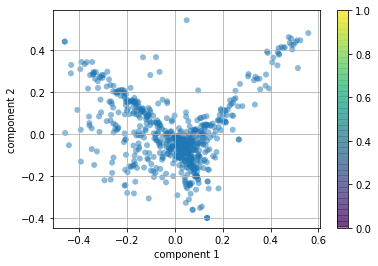

In [19]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [20]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
print(pca.explained_variance_ratio_.sum())

# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
print(pca_temp.n_components_)



0.9509275653678213
155


In [21]:
dbscan = DBSCAN(eps = 0.5, min_samples=5)
# dbscan = DBSCAN(eps = 0.1)
dbscan_cluster = dbscan.fit_predict(df_pca)
# dbscan_cluster

# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))
for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df['project_name'][idx])
dbscan_clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])
dbscan_clustered_dic



df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num


topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
topic_dbscan_clustered_list

[[('javascript', 138),
  ('react', 88),
  ('web', 88),
  ('python', 74),
  ('awesome', 67),
  ('hacktoberfest', 59),
  ('interview', 56),
  ('nodejs', 48),
  ('spring', 48),
  ('data', 47),
  ('css', 42),
  ('vue', 41),
  ('test', 40),
  ('api', 39),
  ('html', 38)]]

In [22]:
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster

,num,clusters,cluster_num,top_15_topics
0,-1,"[freeCodeCamp/freeCodeCamp, 996icu/996.ICU, Eb...",696,"[(javascript, 138), (react, 88), (web, 88), (p..."
